In [1]:
library('tidymodels')
library('palmerpenguins')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: ‘palmerpenguins’


The following object is masked from ‘package:modeldata’:

    penguins




In [2]:
penguins2 = penguins |> 
    drop_na() |> 
    filter(species %in% c('Adelie', 'Gentoo')) |>
    mutate(
        species = forcats::fct_drop(species), 
        species_numeric = as.numeric(species) - 1
    ) 

penguins2 |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_numeric
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,0
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,0
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,0
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,0
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,0
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,0


## Species versus bill length plot

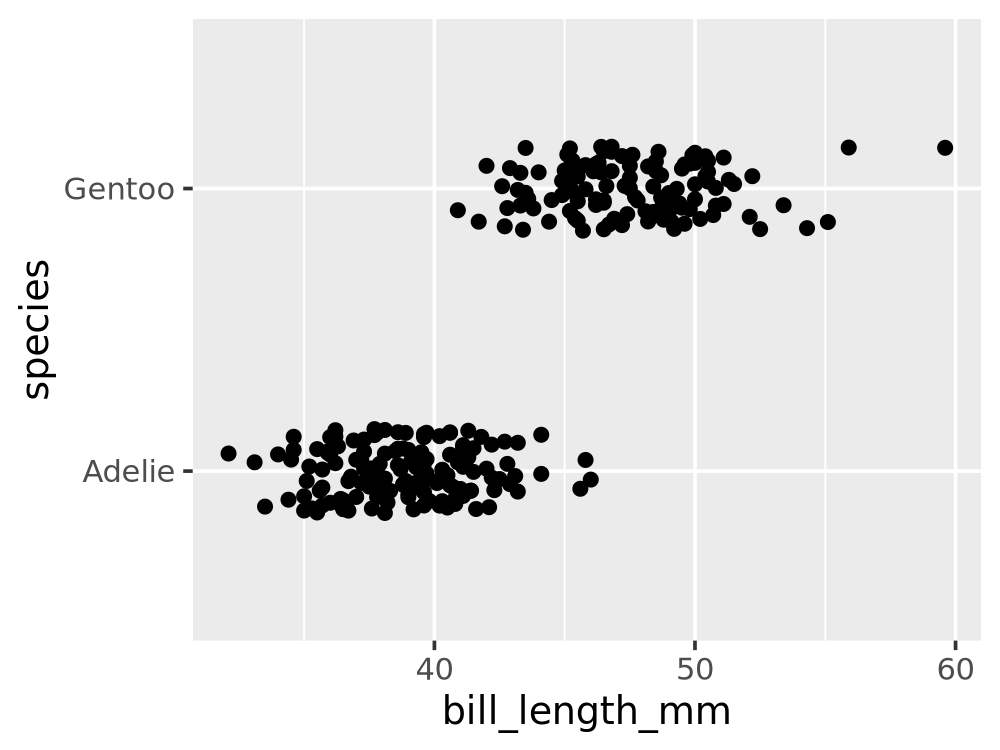

In [3]:
ggplot(penguins2, aes(y = species, x = bill_length_mm)) + 
    geom_point(position = position_jitter(width = 0, height = 0.15))

Same plot but now with `species` encoded as 0 (Adelie) or 1 (Gentoo)

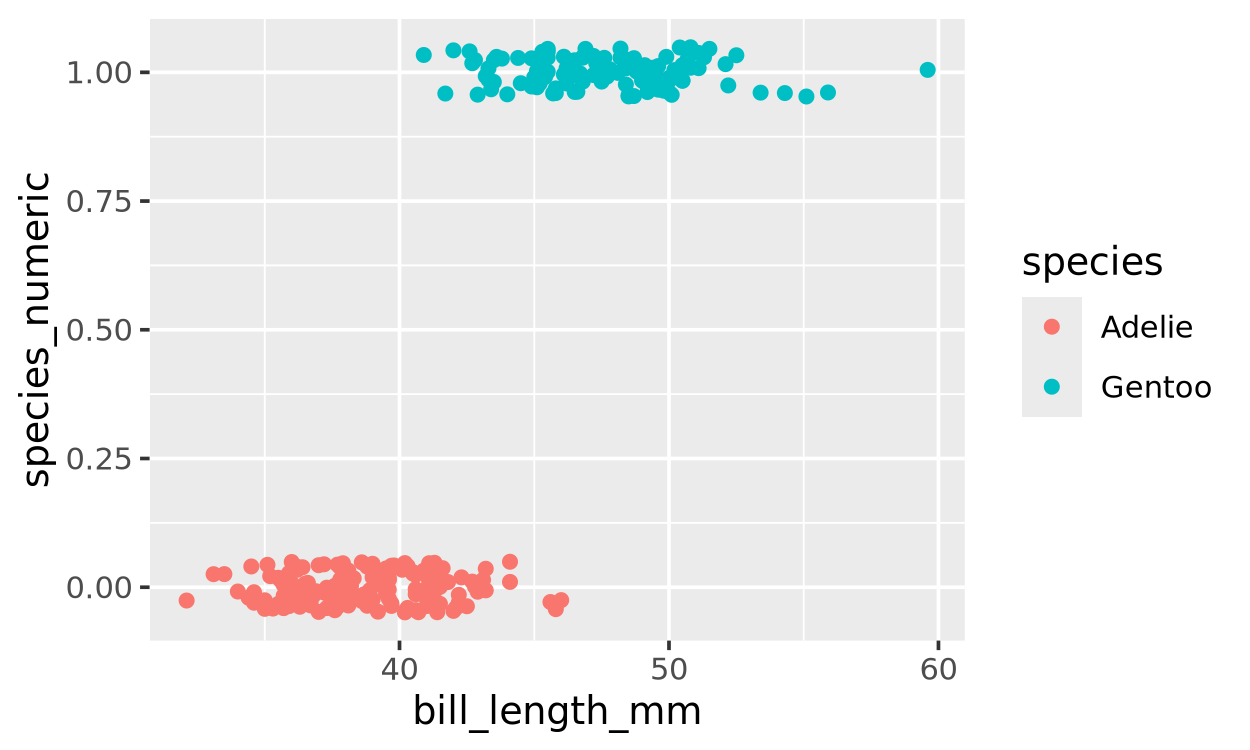

In [4]:
options(repr.plot.width = 5)

ggplot(penguins2, aes(y = species_numeric, x = bill_length_mm, color = species)) +
    geom_point(position = position_jitter(height = 0.05, width = 0))

## Linear regression model

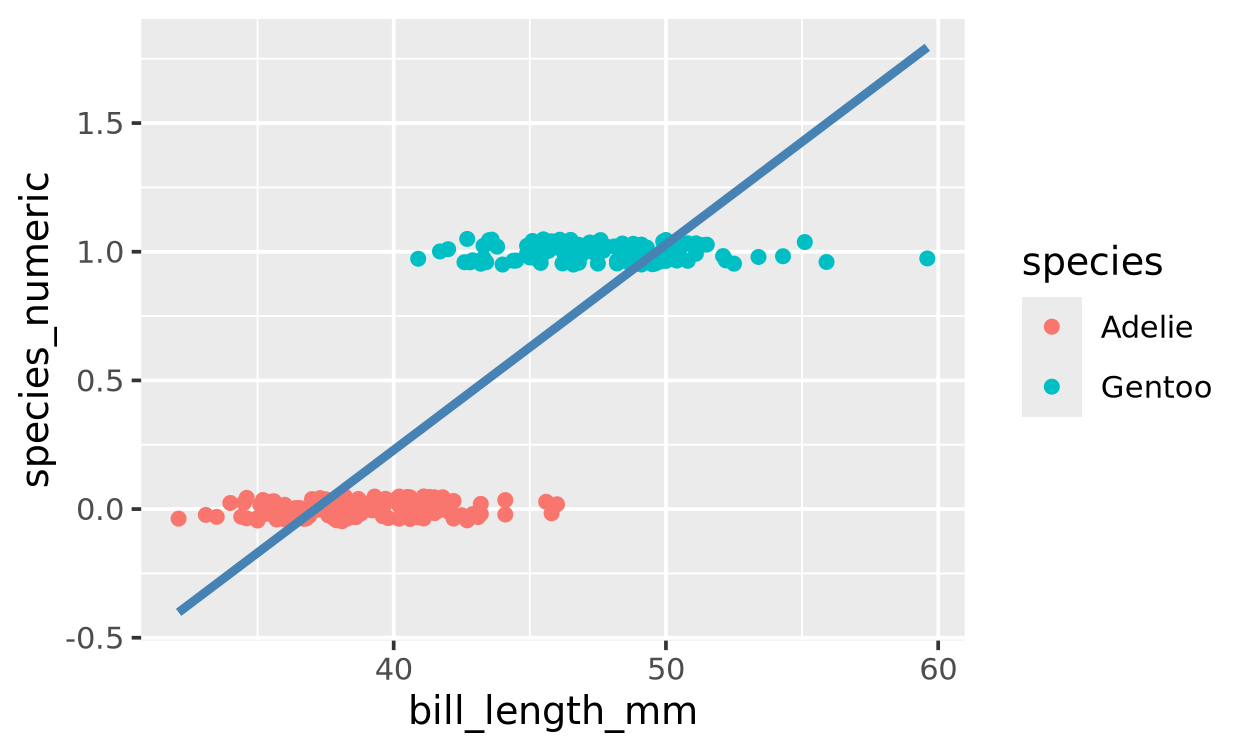

In [5]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(species_numeric ~ bill_length_mm, penguins2)

predict(mod_fit, penguins2) |>
    bind_cols(penguins2) |>
ggplot(aes(y = species_numeric, x = bill_length_mm, color = species)) +
    geom_point(position = position_jitter(height = 0.05, width = 0)) +
    geom_line(aes(y = .pred), color = 'steelblue', linewidth = 1.2)

## Logistic regression model

What if we transformed the line with the [logistic function](https://en.wikipedia.org/wiki/Logistic_function)?

**Starting with a simple line:**

$$y = m \cdot \mathit{bill\_length} + b$$

**Pass the line as an argument to the logistic function:**
$$probability = 1 + \frac{1}{1 + e^{-y}}$$ ⚠️ *Remember that $y$ is our line equation!*

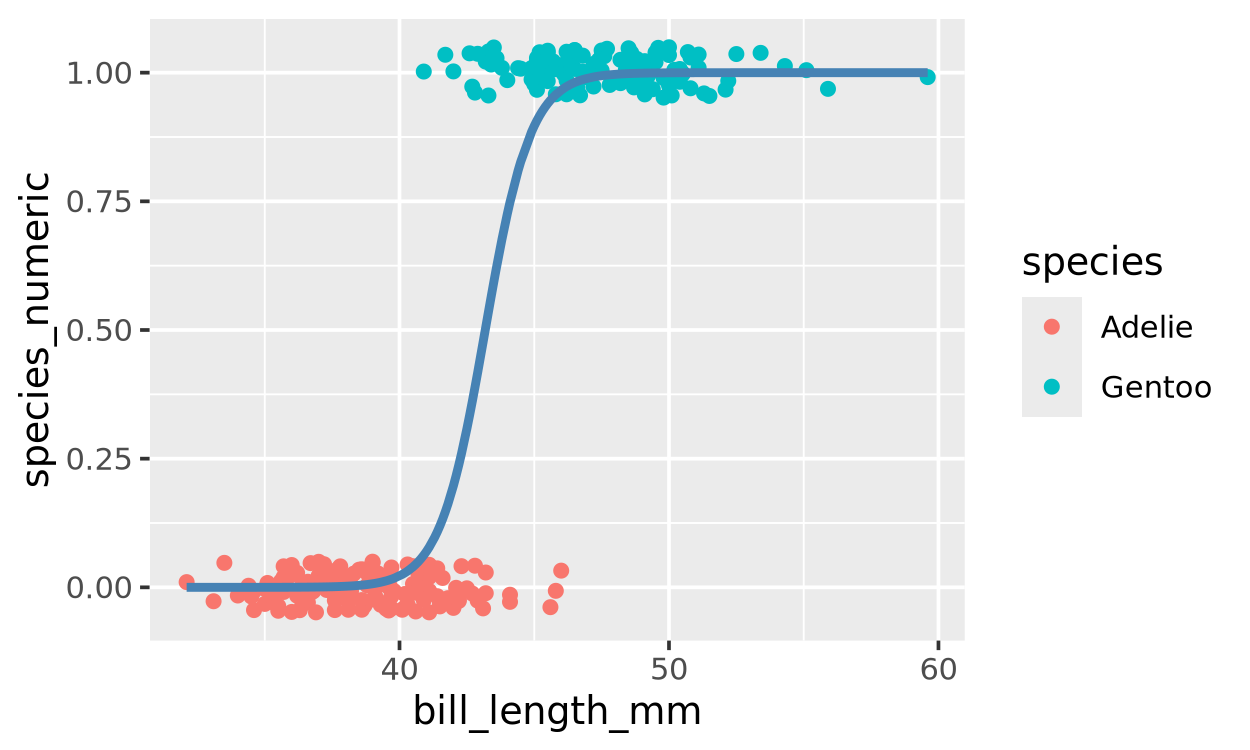

In [6]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(species ~ bill_length_mm, penguins2)

predict(mod_fit, penguins2, type="prob") |>  # have to ask for "prob" values otherwise we get class prediction
    bind_cols(penguins2) |>
ggplot(aes(y = species_numeric, x = bill_length_mm, color = species)) +
    geom_point(position = position_jitter(height = 0.05, width = 0)) +
    geom_line(aes(y = .pred_Gentoo), color = 'steelblue', linewidth = 1.2)  # use .pred_Gentoo instead of .pred